In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [115]:
df = pd.read_csv("/content/train.csv" , usecols = ["Survived","Age","SibSp","Parch"])
df["family"] = df["SibSp"] + df["Parch"]
df.drop(columns = ["SibSp","Parch"] , axis = 1 , inplace = True)
df.head()

,Survived,Age,family
0,0,22.0,1
1,1,38.0,1
2,1,26.0,0
3,1,35.0,1
4,0,35.0,0


In [116]:
X = df.drop(columns = ["Survived"] , axis = 1)
y = df["Survived"]

In [117]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [118]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [119]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6368715083798883

In [120]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv = 10,scoring = "accuracy"))

0.6206741573033708

# **With Binarization**

In [122]:
from sklearn.preprocessing import Binarizer

bin = Binarizer(threshold= 0 , copy = True)

t1 = ColumnTransformer(
    transformers = [
        ("first",bin , ["family"])
    ],
    remainder = "passthrough"
)

X_train_t = t1.fit_transform(X_train)
X_test_t = t1.transform(X_test)


In [129]:
X_train_t = pd.DataFrame(X_train_t , columns = ["Family","Age"])
X_test_t = pd.DataFrame(X_test_t , columns = ["Family","Age"])

In [130]:
X_train_t.sample(10)

,Family,Age
189,0.0,26.0
301,1.0,33.0
126,0.0,NaN
237,1.0,32.0
93,1.0,NaN
223,0.0,NaN
692,0.0,39.0
27,1.0,31.0
277,0.0,20.0
309,1.0,25.0


In [131]:
clf = DecisionTreeClassifier()
clf.fit(X_train_t,y_train)
y_pred = clf.predict(X_test_t)
accuracy_score(y_test,y_pred)

0.6424581005586593

In [134]:
X_t = t1.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_t , y ,cv = 10,scoring = "accuracy"))

0.6083520599250937

In [136]:
X_t = pd.DataFrame(X_t , columns = ["Family","Age"])
X_t.head()

,Family,Age
0,1.0,22.0
1,1.0,38.0
2,0.0,26.0
3,1.0,35.0
4,0.0,35.0


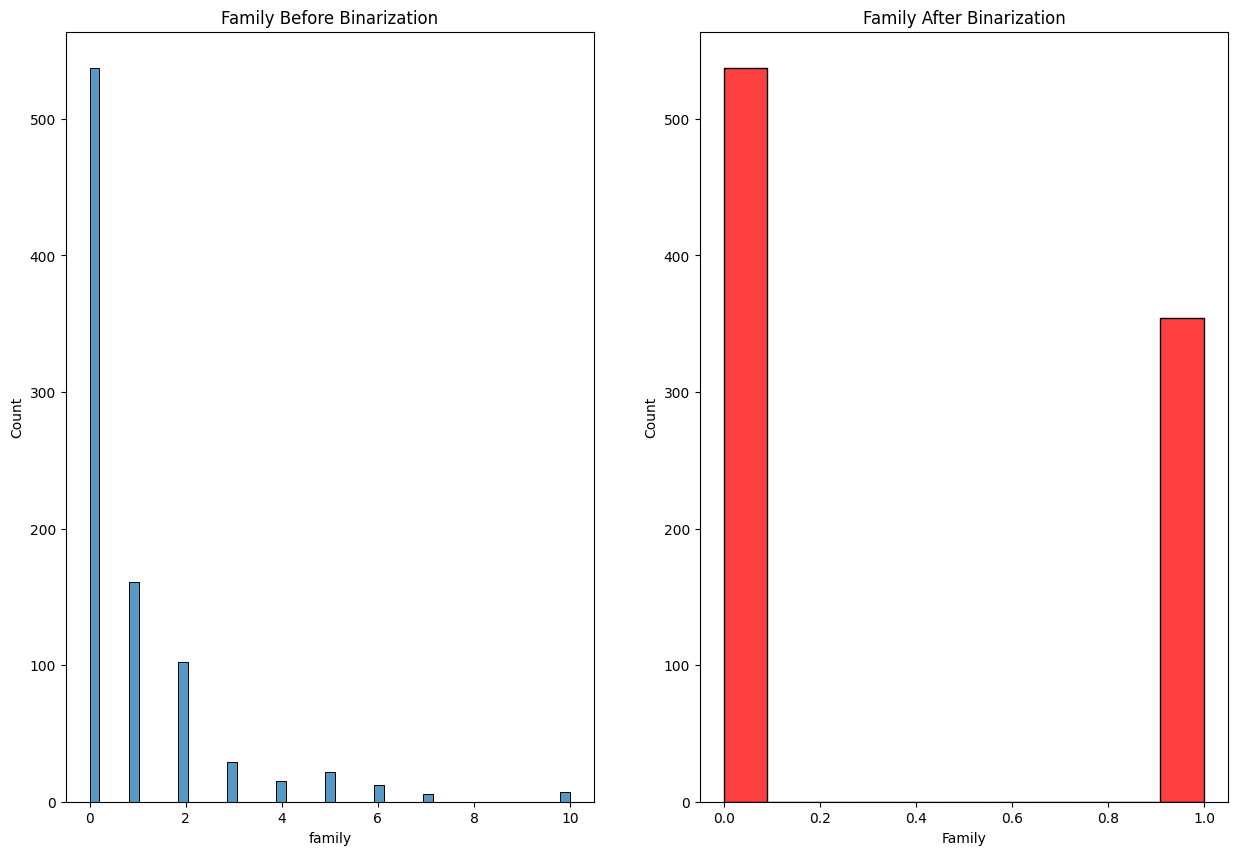

In [139]:
plt.figure(figsize = (15,10))

plt.subplot(121)
sns.histplot(X["family"])
plt.title("Family Before Binarization")

plt.subplot(122)
sns.histplot(X_t["Family"] , color = "red")
plt.title("Family After Binarization")

plt.show()
